True Permeability (k) ≈ 0.96471 mD
Klinkenberg Factor (b) ≈ 50.27440


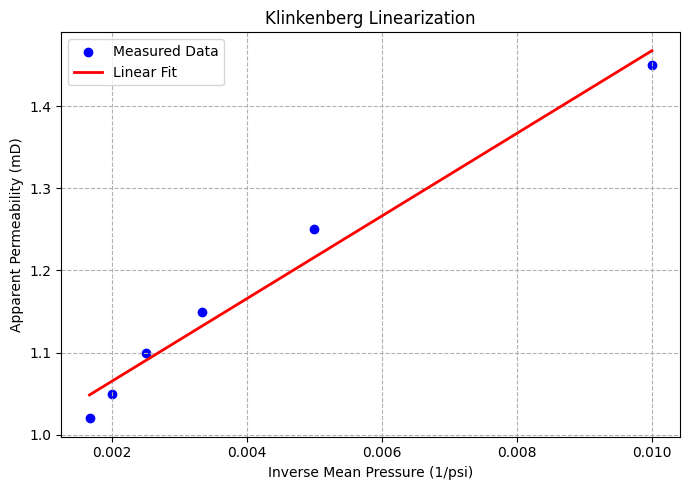

In [1]:
import csv
import matplotlib.pyplot as plt

# --- Step 1: Create a synthetic dataset and save as CSV ---
rows = [
    ["mean_pressure", "apparent_permeability"],
    [100, 1.45],
    [200, 1.25],
    [300, 1.15],
    [400, 1.10],
    [500, 1.05],
    [600, 1.02],
]

csv_file = "klinkenberg_data.csv"
with open(csv_file, "w", newline="") as f:
    writer = csv.writer(f)
    writer.writerows(rows)

# --- Step 2: Read the dataset back from CSV ---
pressure_vals, k_app_vals = [], []

with open(csv_file) as f:
    reader = csv.reader(f)
    header = next(reader)   # skip header
    for row in reader:
        pressure_vals.append(float(row[0]))
        k_app_vals.append(float(row[1]))

# --- Step 3: Transform variable (1/p) ---
x_vals = [1.0 / p for p in pressure_vals]   # independent variable
y_vals = k_app_vals                         # dependent variable

# --- Step 4: Manual linear regression ---
N = len(x_vals)
sx = sum(x_vals)
sy = sum(y_vals)
sxx = sum(x * x for x in x_vals)
sxy = sum(x * y for x, y in zip(x_vals, y_vals))

denom = N * sxx - sx * sx
m = (N * sxy - sx * sy) / denom     # slope = Klinkenberg factor
c = (sy * sxx - sx * sxy) / denom   # intercept = True permeability

print(f"True Permeability (k) ≈ {c:.5f} mD")
print(f"Klinkenberg Factor (b) ≈ {m:.5f}")

# --- Step 5: Predictions ---
fit_line = [c + m * xi for xi in x_vals]

# --- Step 6: Plotting ---
plt.figure(figsize=(7,5))
plt.scatter(x_vals, y_vals, c="blue", label="Measured Data")
plt.plot(x_vals, fit_line, "r-", lw=2, label="Linear Fit")
plt.xlabel("Inverse Mean Pressure (1/psi)")
plt.ylabel("Apparent Permeability (mD)")
plt.title("Klinkenberg Linearization")
plt.legend()
plt.grid(True, ls="--", alpha=1.0)
plt.tight_layout()
plt.show()
